## Contents
Considering the trade-off between Deaths and Costs:

### MORO 1. Death-Literature * 0.01, Cost-mean
High restriction for the Cost

### MORO 2. Death-0, Cost-max90%
High restriction for the death

In [1]:
import time, itertools
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from ema_workbench import MultiprocessingEvaluator
from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

from ema_workbench.em_framework.optimization import ArchiveLogger
from ema_workbench.util import ema_logging
from ema_workbench.analysis import parcoords

from problem_formulation import get_model_for_problem_formulation
ema_logging.log_to_stderr(ema_logging.INFO)

from MORO import *

C:\Users\mhose\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)
C:\Users\mhose\Anaconda3\lib\importlib\_bootstrap.py:219: ImportWarning: can't resolve package from __spec__ or __package__, falling back on __name__ and __path__
  return f(*args, **kwds)


In [2]:
dike_model = get_model_for_problem_formulation(5)

[MainProcess/INFO] model initialized


In [3]:
decision_varnames = list(dike_model.levers.keys())
decision_varnames

['A.1_DikeIncrease',
 'A.2_DikeIncrease',
 'A.3_DikeIncrease',
 'A.4_DikeIncrease',
 'A.5_DikeIncrease',
 '0_RfR',
 '1_RfR',
 '2_RfR',
 '3_RfR',
 '4_RfR',
 'EWS_DaysToThreat']

In [4]:
outcome_varnames = ["frac_{}".format(var_name) for var_name in dike_model.outcomes.keys()]
outcome_varnames

['frac_Expected Number of Deaths(1/3)',
 'frac_Expected Number of Deaths(2/5)',
 'frac_Expected Number of Deaths(4)',
 'frac_Dike Investment Costs(1/3)',
 'frac_Dike Investment Costs(2/5)',
 'frac_Dike Investment Costs(4)',
 'frac_RfR Total Costs',
 'frac_Expected Evacuation Costs']

In [5]:
nfe = 5000
n_scenarios = 20
n_out = len(dike_model.outcomes.keys())
scenarios = sample_uncertainties(dike_model, n_scenarios)
epsilons = [5e-02]*n_out

### MORO 1. Death-Literature * 0.01, Cost-mean

In [6]:
thresholds = varying_thresholds(th_death=0.01, th_cost="mean")
thresholds

Expected Number of Deaths(1/3)    4.965900e-03
Expected Number of Deaths(2/5)    9.921000e-03
Expected Number of Deaths(4)      4.000000e-04
Dike Investment Costs(1/3)        3.833398e+07
Dike Investment Costs(2/5)        3.804065e+07
Dike Investment Costs(4)          2.207416e+06
RfR Total Costs                   1.142111e+08
Expected Evacuation Costs         7.669216e+04
dtype: float64

In [7]:
robustness_functions = robustness_func_generator(thresholds)
robustness_functions

[ScalarOutcome('frac_Expected Number of Deaths(1/3)', variable_name=['Expected Number of Deaths(1/3)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.0049659)),
 ScalarOutcome('frac_Expected Number of Deaths(2/5)', variable_name=['Expected Number of Deaths(2/5)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.009921)),
 ScalarOutcome('frac_Expected Number of Deaths(4)', variable_name=['Expected Number of Deaths(4)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.0004)),
 ScalarOutcome('frac_Dike Investment Costs(1/3)', variable_name=['Dike Investment Costs(1/3)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 38333976.67934588)),
 ScalarOutcome('frac_Dike Investment Costs(2/5)', variable_name=['Dike Investment Costs(2/5)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 38040646.42339278)),
 ScalarOutcome('frac_Dike Investment Costs(4)', variable_name=[

In [8]:
convergence = [
#     EpsilonProgress(),
#     HyperVolume(minimum=[0.0]*n_out, maximum=[1.01]*n_out),
    ArchiveLogger("./archive/MORO/6. final/1. 0.01death_CostMean_seed",
                  decision_varnames=decision_varnames,
                  outcome_varnames=outcome_varnames)
               ]
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.robust_optimize(robustness_functions, scenarios,
                                        nfe=nfe,epsilons=epsilons, convergence=convergence)
end = time.time()
print("Time:", round(end-start,2)/3600, "Hours")

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 300/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 97 policies * 1 model(s) = 1940 experiments
[MainProcess/INFO] 647 cases completed
[MainProcess/INFO] 1294 cases c

[MainProcess/INFO] 660 cases completed
[MainProcess/INFO] 1320 cases completed
[MainProcess/INFO] 1980 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 31: 3073/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 99 policies * 1 model(s) = 1980 experiments
[MainProcess/INFO] 660 cases completed
[MainProcess/INFO] 1320 cases completed
[MainProcess/INFO] 1980 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 32: 3172/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 33: 3272/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 99 policies * 1 model(s) = 1980 experiments
[MainProcess/INFO] 660 cases completed
[MainProcess/INFO] 1320 cases completed
[MainProcess/INFO] 1980 cases completed
[MainProcess/INFO] experiments f

Time: 7.093222222222222 Hours


In [9]:
results

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,frac_Expected Number of Deaths(1/3),frac_Expected Number of Deaths(2/5),frac_Expected Number of Deaths(4),frac_Dike Investment Costs(1/3),frac_Dike Investment Costs(2/5),frac_Dike Investment Costs(4),frac_RfR Total Costs,frac_Expected Evacuation Costs
0,6,5,9,0,5,1,0,1,1,1,3,1.00,1.00,0.70,0.0,0.0,1.0,0.0,1.0
1,0,7,8,7,7,1,1,0,0,0,3,0.95,1.00,1.00,1.0,0.0,0.0,0.0,1.0
2,6,6,8,7,6,1,0,0,0,0,2,1.00,1.00,1.00,0.0,0.0,0.0,1.0,1.0
3,8,7,8,0,4,1,0,0,0,0,4,1.00,1.00,0.50,0.0,0.0,1.0,1.0,1.0
4,4,0,5,10,6,1,1,1,1,0,4,1.00,0.85,1.00,0.0,1.0,0.0,0.0,1.0
5,6,0,6,0,4,0,1,1,1,1,3,1.00,0.85,0.70,0.0,1.0,1.0,0.0,1.0
6,0,6,9,7,5,1,0,0,0,0,4,0.80,1.00,1.00,1.0,0.0,0.0,1.0,1.0
7,0,0,10,0,1,1,0,0,0,0,4,0.80,0.45,0.50,1.0,1.0,1.0,1.0,1.0
8,0,7,7,0,7,1,1,1,1,1,3,0.95,1.00,0.70,1.0,0.0,1.0,0.0,1.0
9,0,0,5,7,2,1,0,0,0,0,2,0.70,0.50,1.00,1.0,1.0,0.0,1.0,1.0


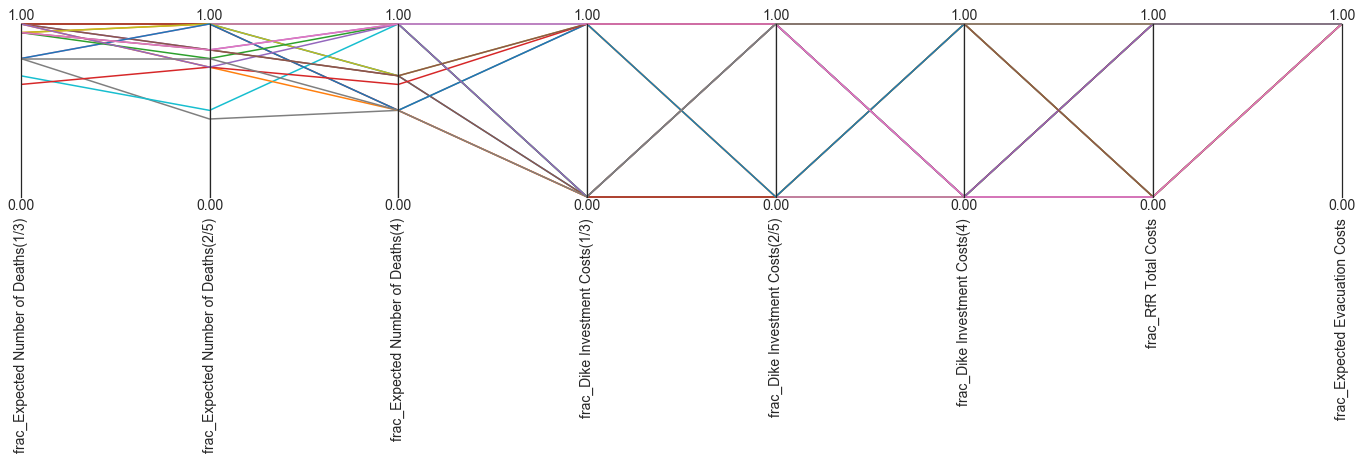

In [8]:
path = "./archive/MORO/6. final/1. 0.01death_CostMean_seed/archive_51.csv"
results = pd.read_csv(path, index_col=0)

data = results.loc[:, outcome_varnames]
limits = parcoords.get_limits(data).apply(lambda x: [0,1])

paraxes = parcoords.ParallelAxes(limits)
paraxes.fig.set_size_inches(20,30)
paraxes.plot(data)

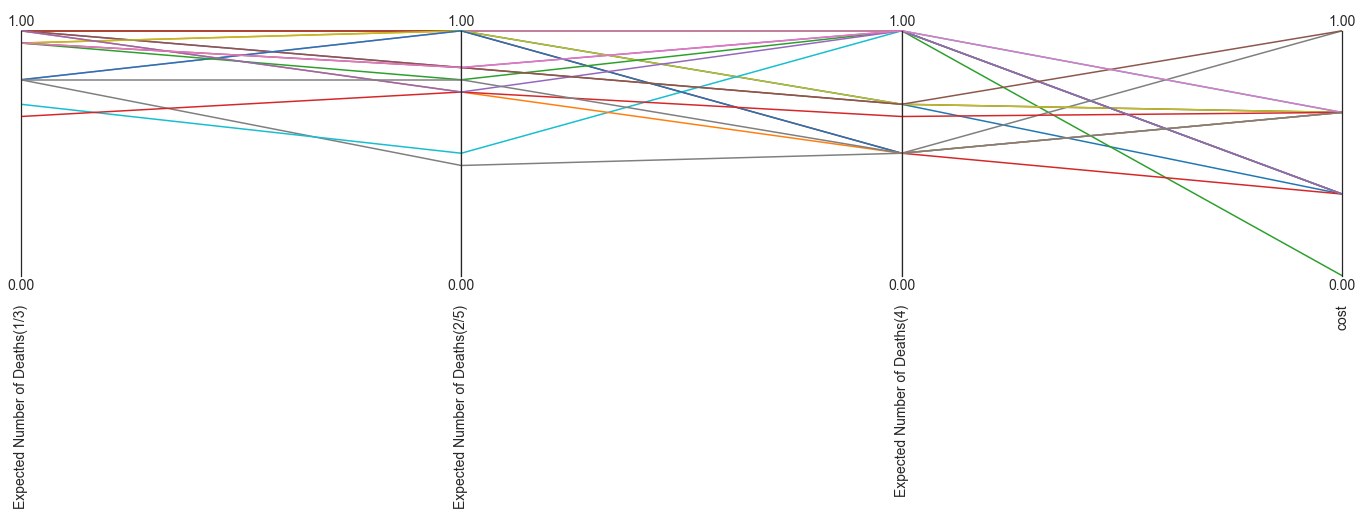

In [9]:
data = results.loc[:, outcome_varnames]

data = data.iloc[:, :-1]
data["cost"] = data.iloc[:,-4:-1].apply(lambda x: x.mean(), axis=1).values
data = data.drop("frac_Dike Investment Costs(1/3)	frac_Dike Investment Costs(2/5)	frac_Dike Investment Costs(4)	frac_RfR Total Costs".split("	"), axis=1)
data.columns = data.columns.map(lambda x: re.sub("frac_", "", x))

limits = parcoords.get_limits(data).apply(lambda x: [0,1])

paraxes = parcoords.ParallelAxes(limits)
paraxes.fig.set_size_inches(20,20)
paraxes.plot(data.loc[:,:])

### MORO 2. Death-0, Cost-max90%

In [9]:
thresholds = varying_thresholds(th_death=0, th_cost=0.9)
thresholds

Expected Number of Deaths(1/3)    0.000000e+00
Expected Number of Deaths(2/5)    0.000000e+00
Expected Number of Deaths(4)      0.000000e+00
Dike Investment Costs(1/3)        7.310586e+07
Dike Investment Costs(2/5)        7.161191e+07
Dike Investment Costs(4)          6.878559e+06
RfR Total Costs                   5.355900e+08
Expected Evacuation Costs         9.760323e+04
dtype: float64

In [10]:
robustness_functions = robustness_func_generator(thresholds)
robustness_functions

[ScalarOutcome('frac_Expected Number of Deaths(1/3)', variable_name=['Expected Number of Deaths(1/3)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.0)),
 ScalarOutcome('frac_Expected Number of Deaths(2/5)', variable_name=['Expected Number of Deaths(2/5)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.0)),
 ScalarOutcome('frac_Expected Number of Deaths(4)', variable_name=['Expected Number of Deaths(4)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 0.0)),
 ScalarOutcome('frac_Dike Investment Costs(1/3)', variable_name=['Dike Investment Costs(1/3)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 73105859.01188207)),
 ScalarOutcome('frac_Dike Investment Costs(2/5)', variable_name=['Dike Investment Costs(2/5)'], function=functools.partial(<function robustness at 0x0000014913233BF8>, 71611914.91170235)),
 ScalarOutcome('frac_Dike Investment Costs(4)', variable_name=['Dike Investme

In [11]:
convergence = [
#     EpsilonProgress(),
#     HyperVolume(minimum=[0.0]*n_out, maximum=[1.01]*n_out),
    ArchiveLogger("./archive/MORO/6. final/2. 0death_Cost90%_seed",
                  decision_varnames=decision_varnames,
                  outcome_varnames=outcome_varnames)
               ]
start = time.time()
with MultiprocessingEvaluator(dike_model) as evaluator:
    results = evaluator.robust_optimize(robustness_functions, scenarios,
                                        nfe=nfe,epsilons=epsilons, convergence=convergence)
end = time.time()
print("Time:", round(end-start,2)/3600, "Hours")

[MainProcess/INFO] pool started
[MainProcess/INFO] generation 0: 0/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 1: 100/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases completed
[MainProcess/INFO] 1334 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 2: 200/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 98 policies * 1 model(s) = 1960 experiments
[MainProcess/INFO] 653 cases completed
[MainProcess/INFO] 1306 cases completed
[MainProcess/INFO] 1959 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 3: 298/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 100 policies * 1 model(s) = 2000 experiments
[MainProcess/INFO] 667 cases c

[MainProcess/INFO] generation 30: 2960/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 94 policies * 1 model(s) = 1880 experiments
[MainProcess/INFO] 627 cases completed
[MainProcess/INFO] 1254 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 31: 3054/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 95 policies * 1 model(s) = 1900 experiments
[MainProcess/INFO] 633 cases completed
[MainProcess/INFO] 1266 cases completed
[MainProcess/INFO] 1899 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 32: 3149/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 92 policies * 1 model(s) = 1840 experiments
[MainProcess/INFO] 613 cases completed
[MainProcess/INFO] 1226 cases completed
[MainProcess/INFO] 1839 cases completed
[MainProcess/INFO] experiments finished
[MainProcess/INFO] generation 33: 3241/5000 nfe
[MainProcess/INFO] performing 20 scenarios * 95 policies * 1 model(s) = 1900 experiments
[MainProcess/IN

Time: 5.92685 Hours


In [13]:
results

,A.1_DikeIncrease,A.2_DikeIncrease,A.3_DikeIncrease,A.4_DikeIncrease,A.5_DikeIncrease,0_RfR,1_RfR,2_RfR,3_RfR,4_RfR,EWS_DaysToThreat,frac_Expected Number of Deaths(1/3),frac_Expected Number of Deaths(2/5),frac_Expected Number of Deaths(4),frac_Dike Investment Costs(1/3),frac_Dike Investment Costs(2/5),frac_Dike Investment Costs(4),frac_RfR Total Costs,frac_Expected Evacuation Costs
0,4,2,9,2,4,1,0,1,1,1,3,0.95,0.30,0.55,1.0,1.0,1.0,1.0,1.0
1,9,2,8,2,5,1,0,1,1,1,4,1.00,0.45,0.55,0.0,1.0,1.0,1.0,1.0
2,4,2,6,2,5,1,0,1,1,1,0,0.85,0.45,0.55,1.0,1.0,1.0,1.0,1.0
3,6,8,9,10,10,1,1,1,1,0,3,1.00,1.00,1.00,0.0,0.0,0.0,1.0,1.0
4,3,2,8,2,5,1,1,1,1,0,1,0.95,0.45,0.50,1.0,1.0,1.0,1.0,1.0
5,3,8,9,10,10,1,1,1,1,0,3,0.95,1.00,1.00,1.0,0.0,0.0,1.0,1.0
6,3,2,9,10,5,1,1,1,1,0,2,0.95,0.45,1.00,1.0,1.0,0.0,1.0,1.0
7,6,2,9,9,5,1,1,1,1,0,3,1.00,0.45,1.00,0.0,1.0,0.0,1.0,1.0
8,2,2,8,2,5,1,1,1,1,1,1,0.95,0.45,0.55,1.0,1.0,1.0,0.0,1.0
9,4,9,9,2,10,1,0,1,1,1,3,0.95,1.00,0.55,1.0,0.0,1.0,1.0,1.0


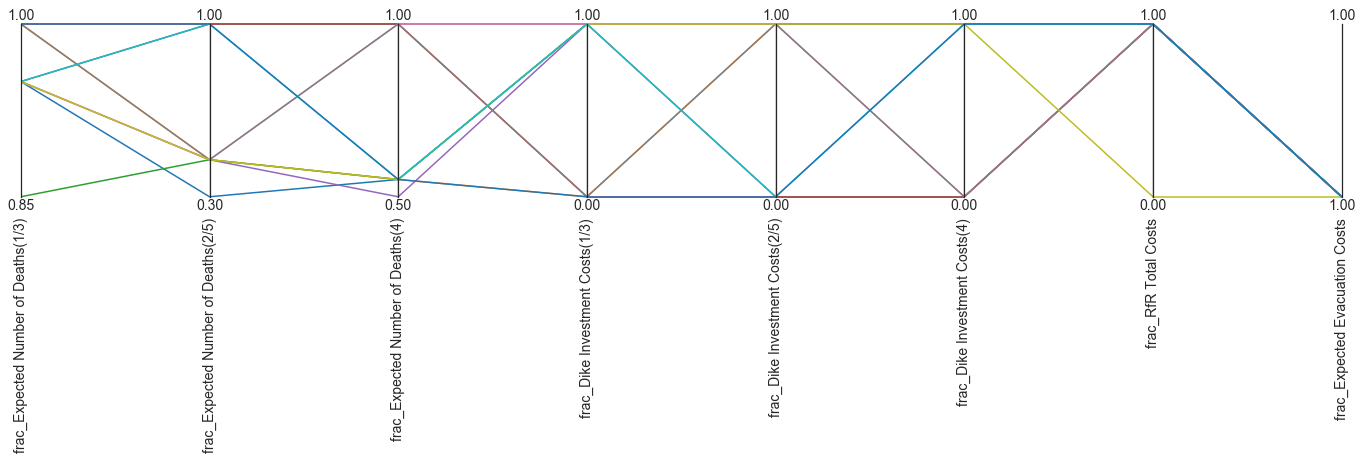

In [12]:
path = "./archive/MORO/6. final/2. 0death_Cost90%_seed/archive_51.csv"
results = pd.read_csv(path, index_col=0)

data = results.loc[:, outcome_varnames]

limits = parcoords.get_limits(data)

paraxes = parcoords.ParallelAxes(limits)
paraxes.fig.set_size_inches(20,30)
paraxes.plot(data.loc[:,:])

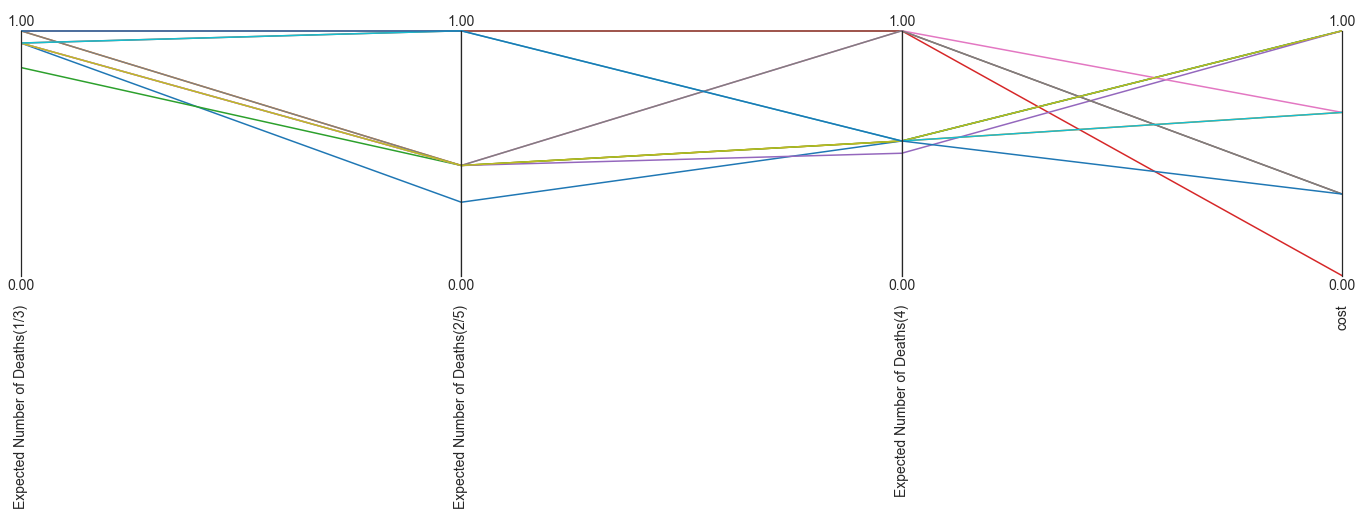

In [13]:
data = results.loc[:, outcome_varnames]

data = data.iloc[:, :-1]
data["cost"] = data.iloc[:,-4:-1].apply(lambda x: x.mean(), axis=1).values
data = data.drop("frac_Dike Investment Costs(1/3)	frac_Dike Investment Costs(2/5)	frac_Dike Investment Costs(4)	frac_RfR Total Costs".split("	"), axis=1)
data.columns = data.columns.map(lambda x: re.sub("frac_", "", x))

limits = parcoords.get_limits(data).apply(lambda x: [0,1])

paraxes = parcoords.ParallelAxes(limits)
paraxes.fig.set_size_inches(20,20)
paraxes.plot(data.loc[:,:])